In [1]:
%%capture

!pip install cirq cirq_ionq matplotlib

In [2]:
import cirq
import cirq_ionq
import matplotlib.pyplot as plt

import os
from getpass import getpass

# Get your API key from https://cloud.ionq.com/settings/keys
api_key = os.getenv('IONQ_API_KEY') or getpass('Enter your IonQ API key: ')
service = cirq_ionq.Service(api_key=api_key, default_target='simulator')

In [3]:
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(
    cirq.H(q0),           # H
    cirq.CX(q0, q1),      # CNOT
    cirq.measure(q0, q1)  # Measure both qubits
)

In [4]:
print(circuit)

0: ───H───@───M───
          │   │
1: ───────X───M───


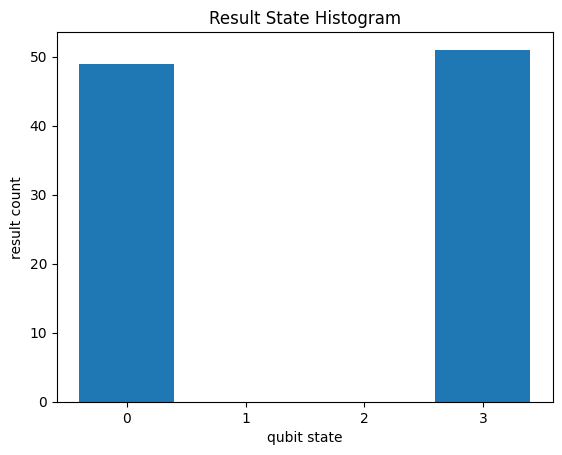

In [5]:
result = service.run(circuit, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()